<h1>CG2020 Trabalho 3 Heloisa Pessoa e Felipe Holanda - SUPER PIXEL </h1>

In [52]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
%matplotlib notebook

In [63]:
def show_gray(img,title):
    plt.figure(figsize = (8,8))
    plt.title(title)
    plt.imshow(img,cmap="gray")
    plt.show()
    
def show_rgb(img,title):
    plt.figure(figsize = (8,8))
    plt.title(title)
    plt.imshow(img)
    plt.show()
    
def show_hist(dat,title):
    plt.figure(figsize = (8,8))
    plt.title(title)
    _=plt.hist(dat,255)
    plt.show()

def show_curve(x,y):
    plt.figure(figsize = (10,4))
    plt.plot(x,y,color = 'b')
    plt.show()  

def show_npy(arr):
    print(f'shape = {arr.shape}, type = {arr.dtype}')
    print(f'min = {np.amin(arr)}, max = {np.amax(arr)}')

def show_spectrum (im_fft,title):
    plt.imshow(np.abs(im_fft), norm = LogNorm(vmin = 5))
    plt.colorbar()
#     plt.savefig(title+'.png')
    plt.show()

<IPython.core.display.Javascript object>


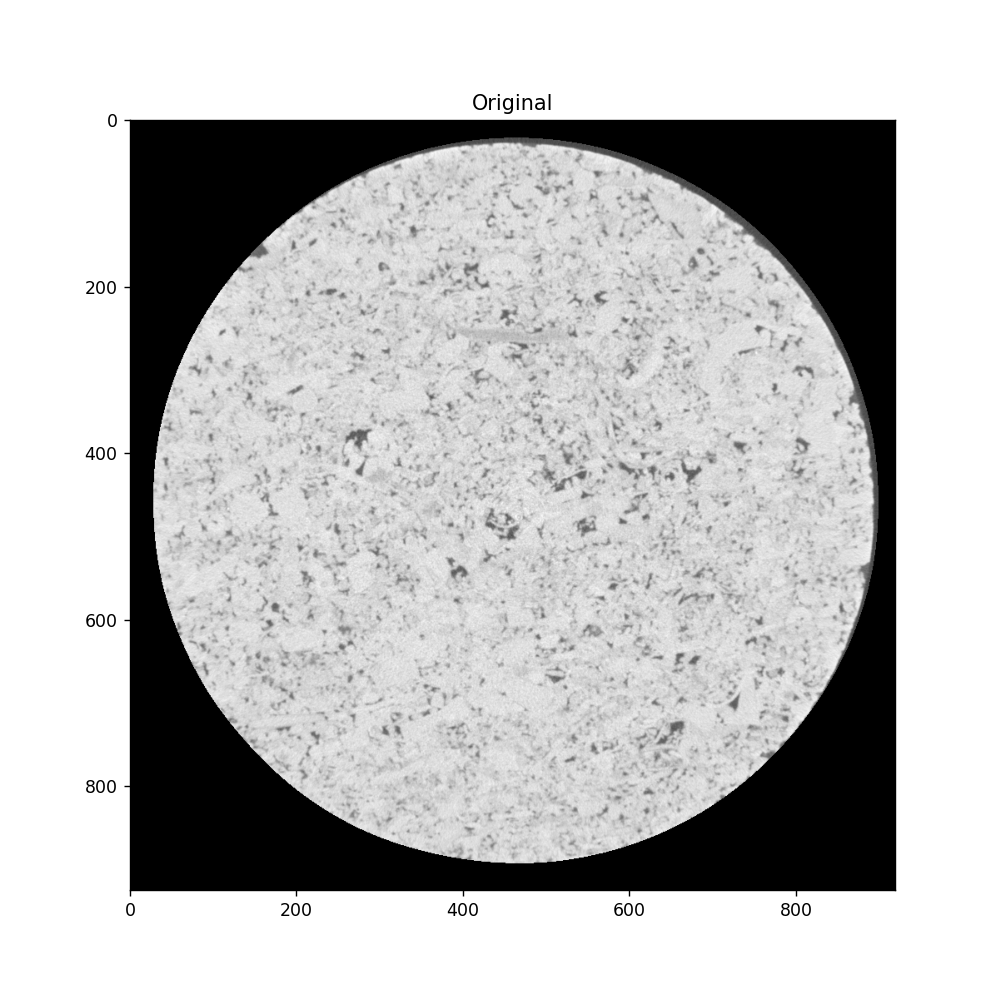

In [7]:
secao = np.load("secao_do_plug.npy")
show_gray(secao, "Original")

<IPython.core.display.Javascript object>


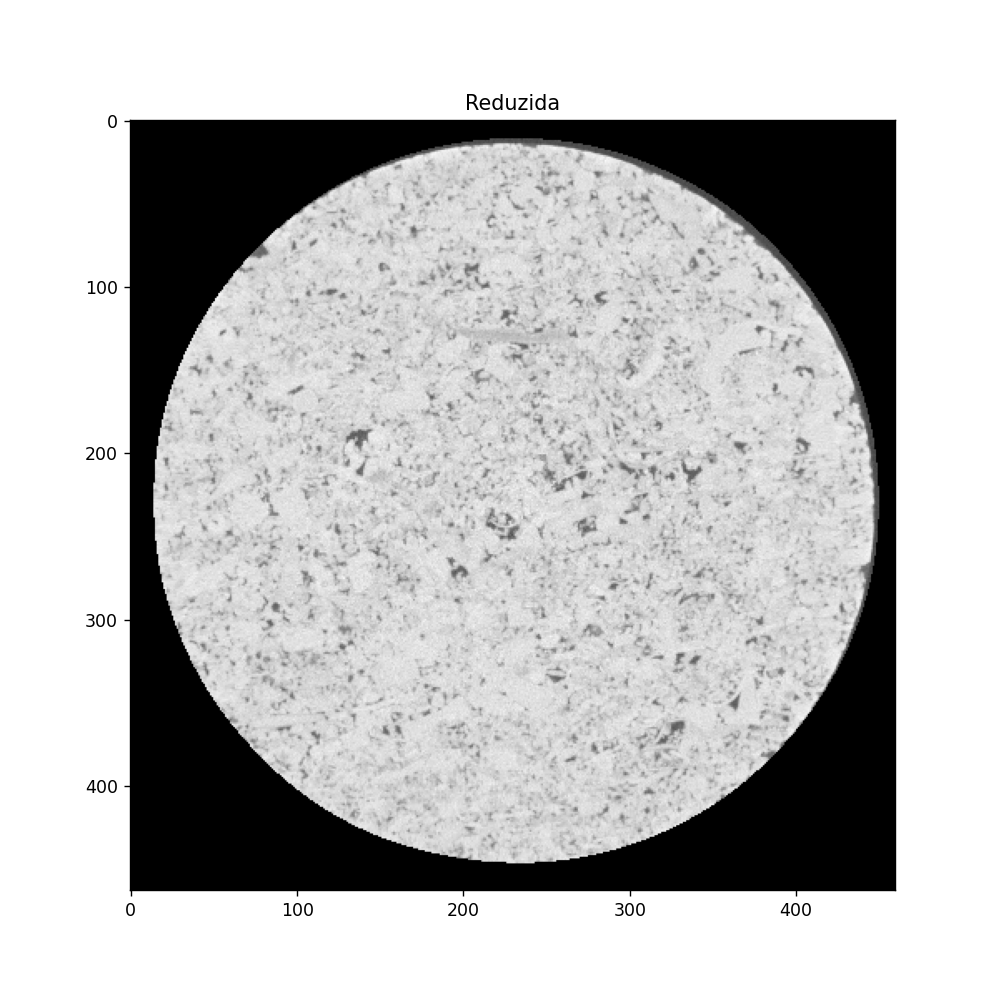

In [8]:
secao2 = secao[::2,::2]
show_gray(secao2,"Reduzida")

<IPython.core.display.Javascript object>


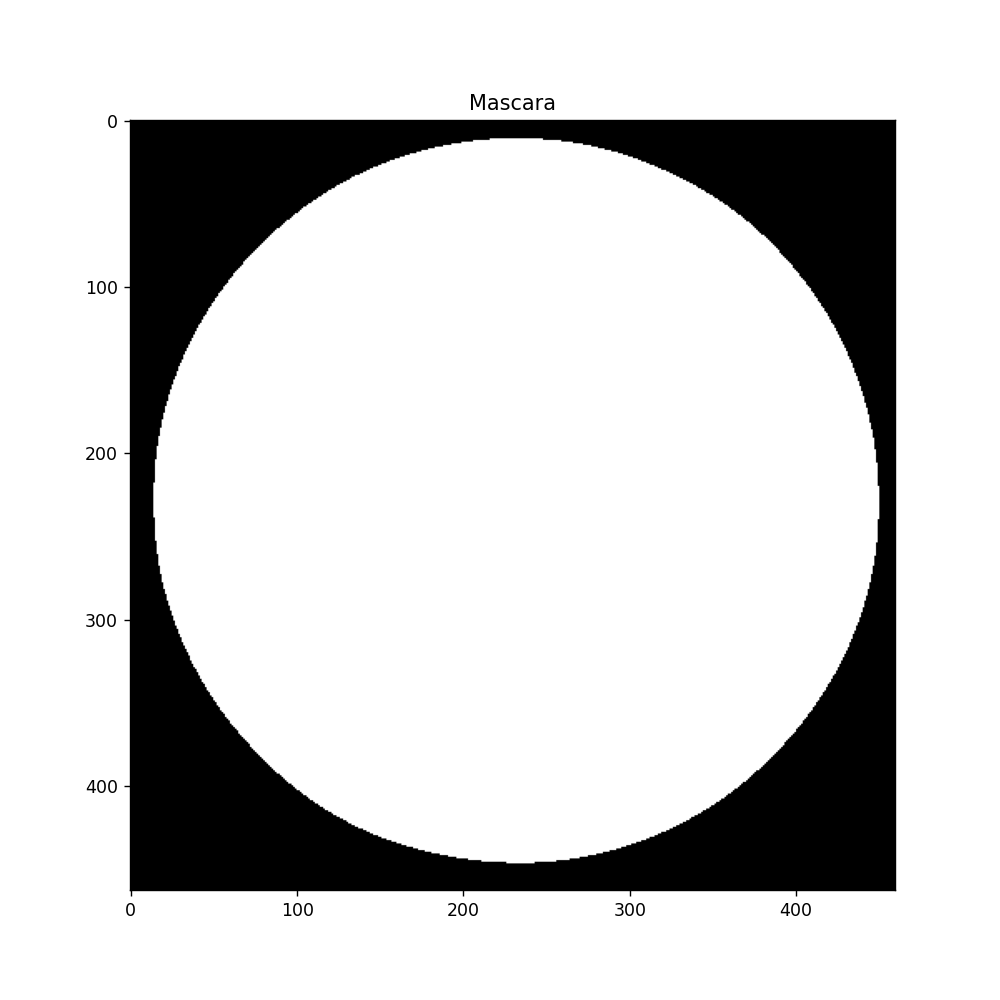

In [9]:
mask1 = secao>0
mask = secao2>0
show_gray(mask, "Mascara")

<IPython.core.display.Javascript object>


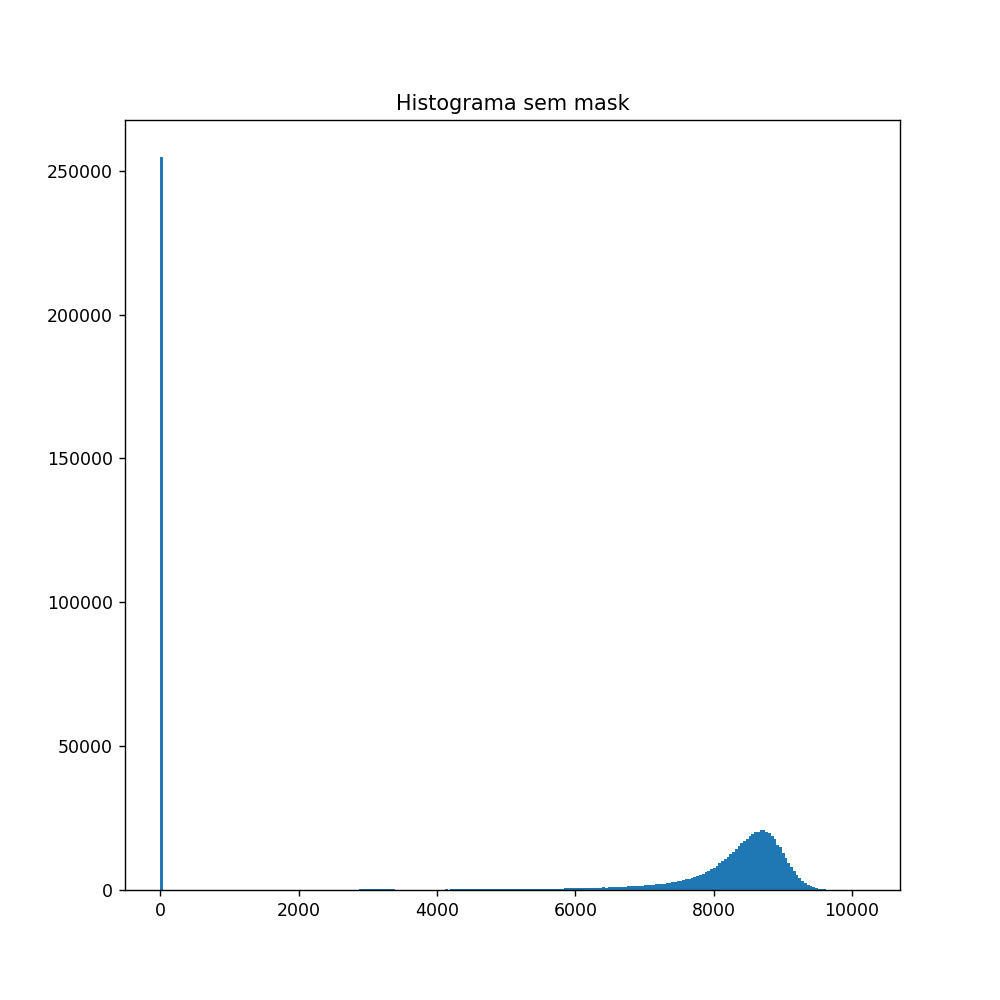

In [10]:
show_hist(secao.ravel(), "Histograma sem mask")

<IPython.core.display.Javascript object>


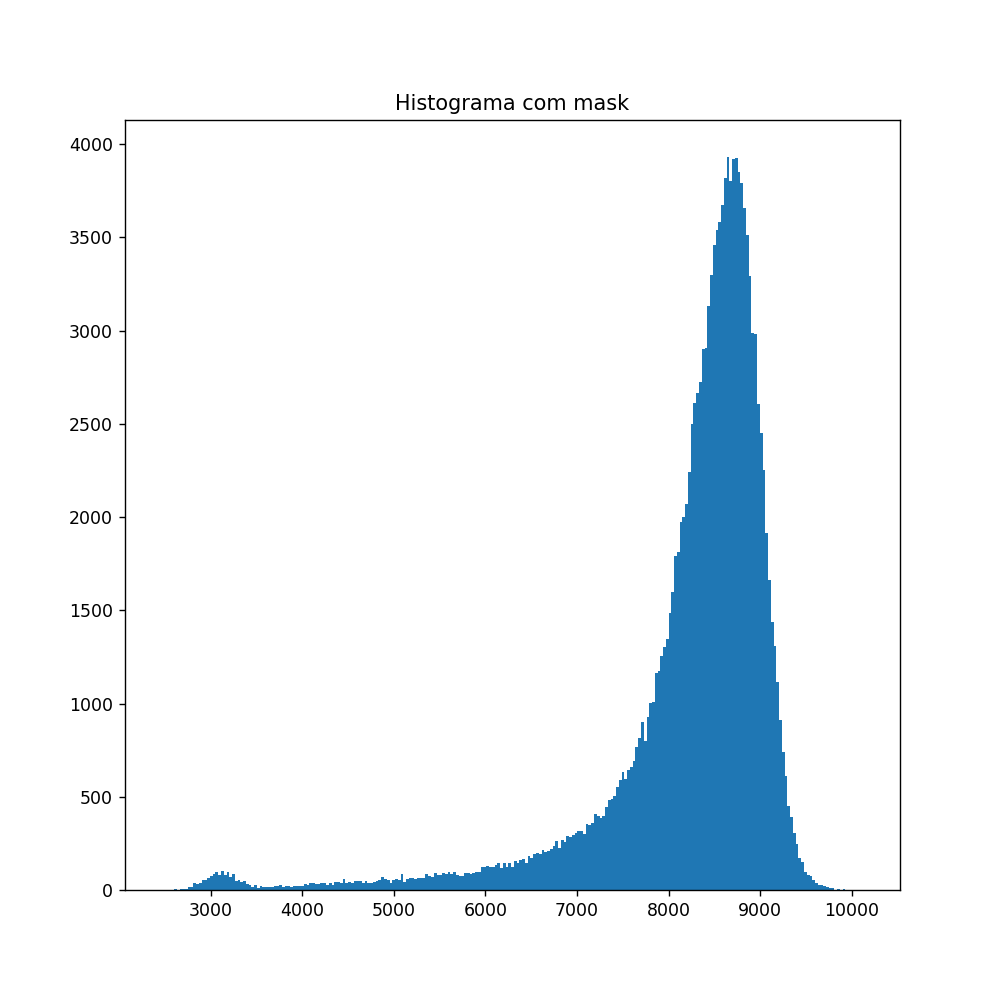

In [17]:
show_hist(secao2[mask].ravel(), "Histograma com mask")

In [12]:
perc = np.percentile(secao2[mask].ravel(),[0.1,99.9])
show_npy(secao2)
show_npy(secao2[mask])
perc

shape = (463, 460), type = uint16
min = 0, max = 10141
shape = (149046,), type = uint16
min = 2450, max = 10141


array([2891., 9605.])

<IPython.core.display.Javascript object>


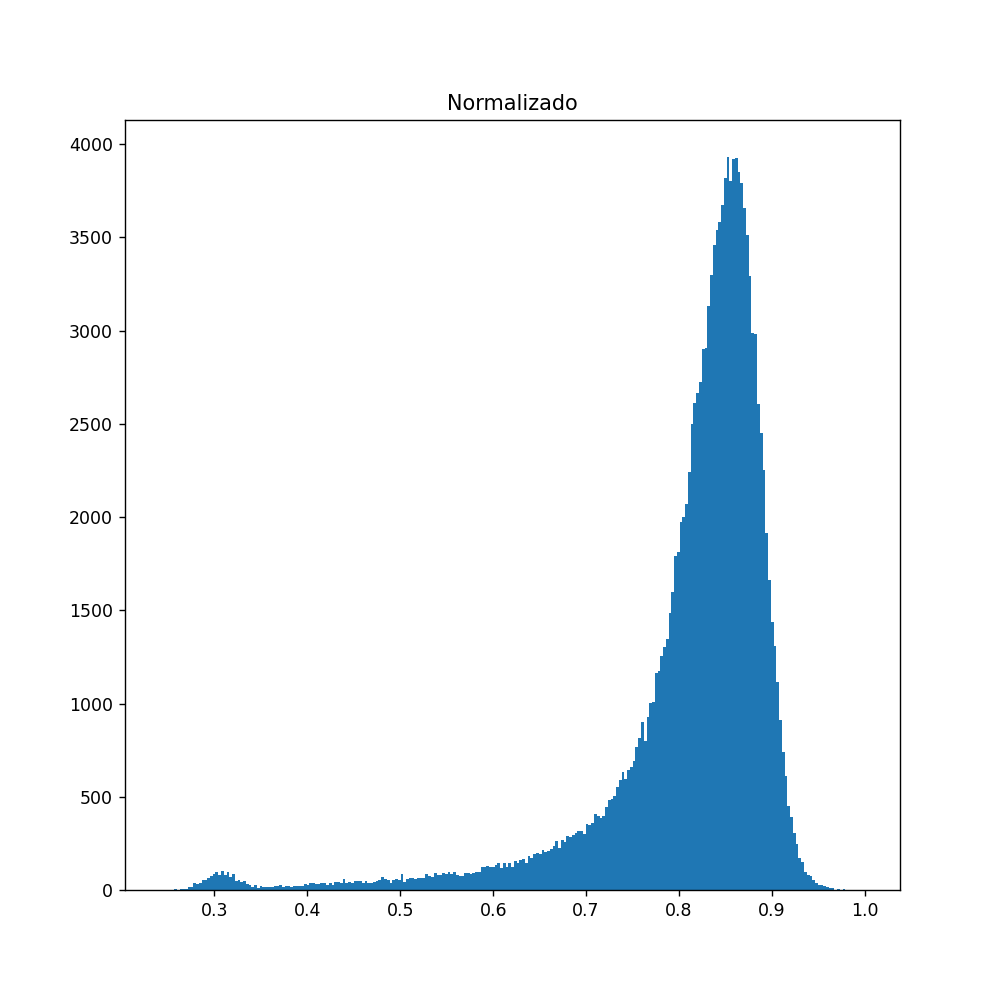

In [18]:
secao1 = secao2.astype(float)
vmax = np.amax(secao1)
vmin = np.amin(secao1)
secao3 = (secao1-vmin)/(vmax - vmin)
show_hist(secao3[mask].ravel(), "Normalizado")

<IPython.core.display.Javascript object>


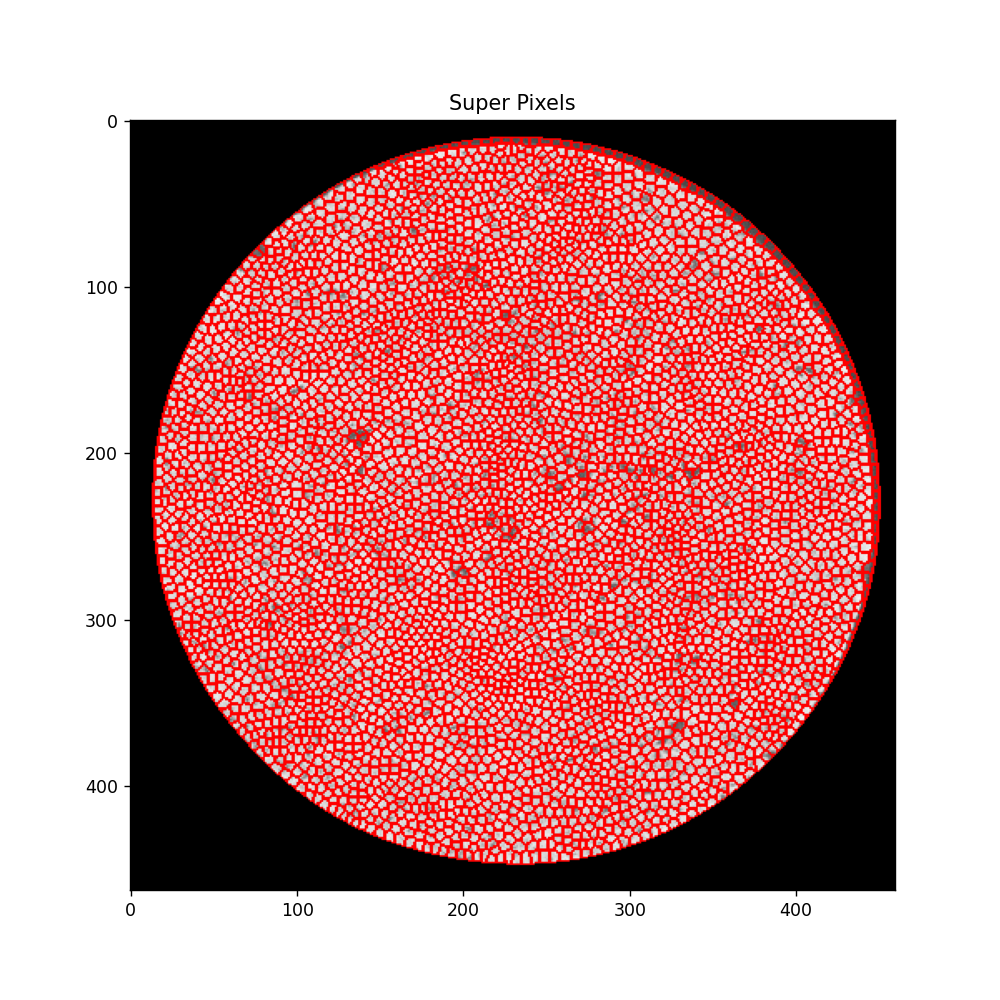

In [19]:
#from skimage import mark_bondaries, slic
import sklearn
import skimage.segmentation as seg
segmentos = seg.slic(secao2, n_segments=5000, compactness= 0.06, max_iter=50, slic_zero=False, start_label=1, mask = mask)
# segmentos
img_sp = seg.mark_boundaries(secao3, segmentos, (1,0,0))
show_rgb(img_sp, "Super Pixels")

In [48]:
import skimage.measure as mes
props = mes.regionprops_table(img_sp.astype(int), properties=('centroid','major_axis_length','minor_axis_length'))

In [60]:
prop = mes.regionprops(img_sp.astype(int))